# Clustering Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df_desc=pd.read_excel("EastWestAirlines.xlsx",sheet_name='Description',header=None)

In [4]:
df_desc

,0,1,2,3,4
0,East-West Airlines is trying to learn more abo...,NaN,NaN,NaN,NaN
1,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
2,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
6,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description


In [5]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
df.shape

(3999, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(columns=['ID#'],axis=1,inplace=True)

In [11]:
df.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


In [12]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [13]:
df['Qual_miles'].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
1678       1
2954       1
2273       1
739        1
1005       1
Name: count, Length: 164, dtype: int64

In [14]:
df['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [15]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [16]:
df[['cc1_miles','cc2_miles','cc3_miles','Award?']]=df[['cc1_miles','cc2_miles','cc3_miles','Award?']].astype('category')

In [17]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


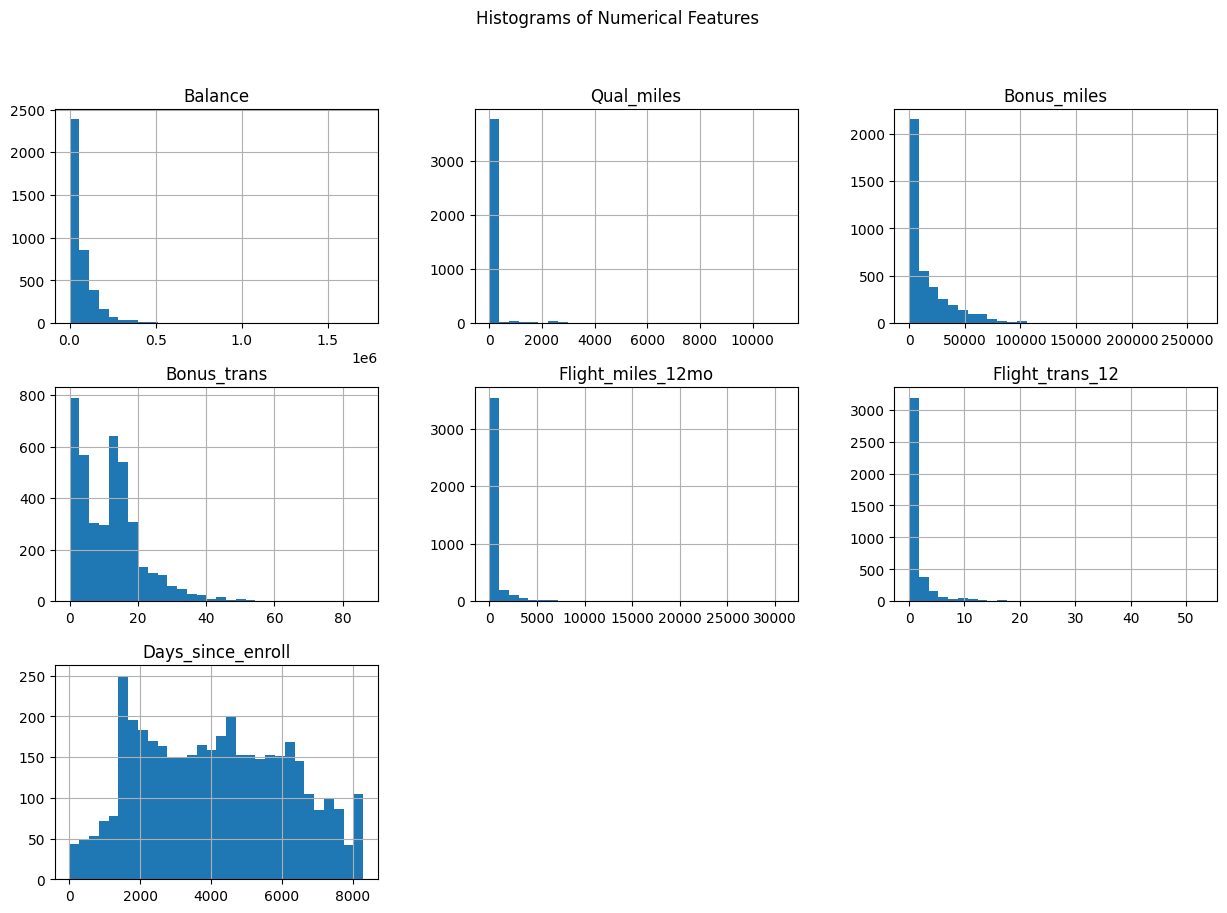

In [18]:
# 3. Univariate Analysis
# Histograms for numeric columns
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()


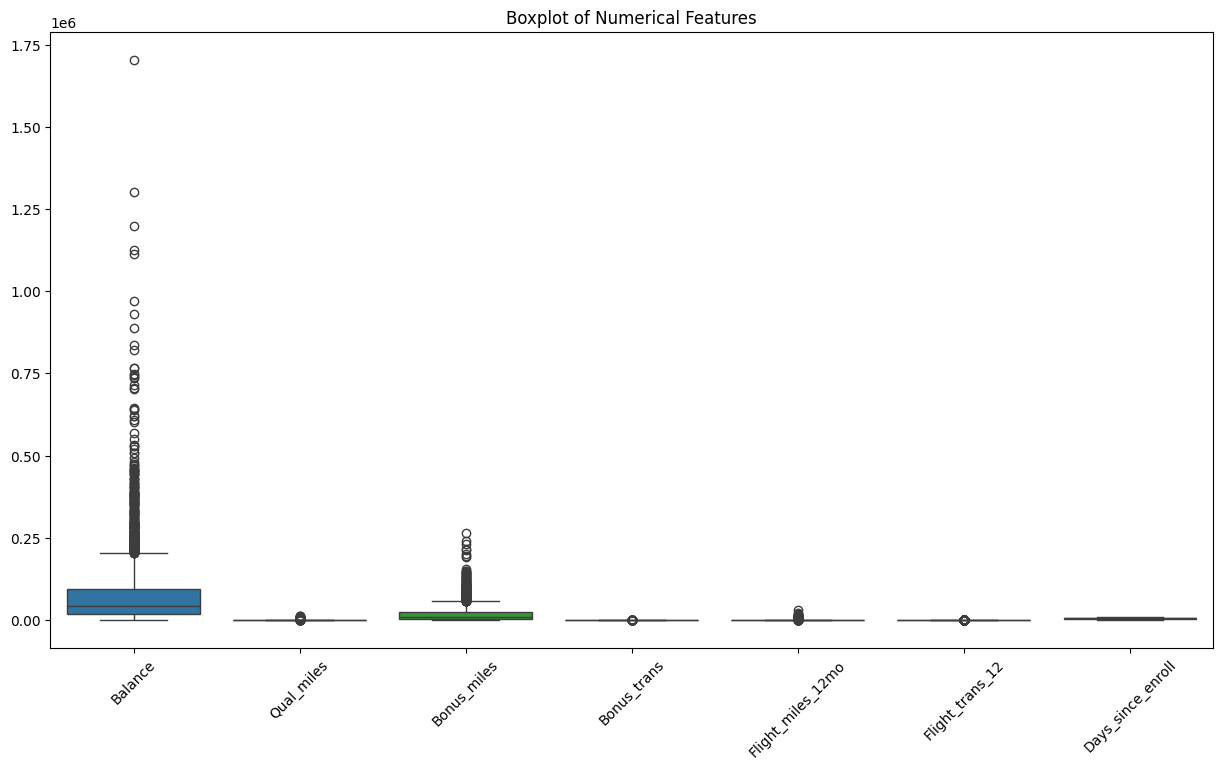

In [19]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=["Award?"]))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [20]:
# Frequency counts of categorical features
for col in ["cc1_miles", "cc2_miles", "cc3_miles", "Award?"]:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for cc1_miles:
cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

Value counts for cc2_miles:
cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

Value counts for cc3_miles:
cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

Value counts for Award?:
Award?
0    2518
1    1481
Name: count, dtype: int64


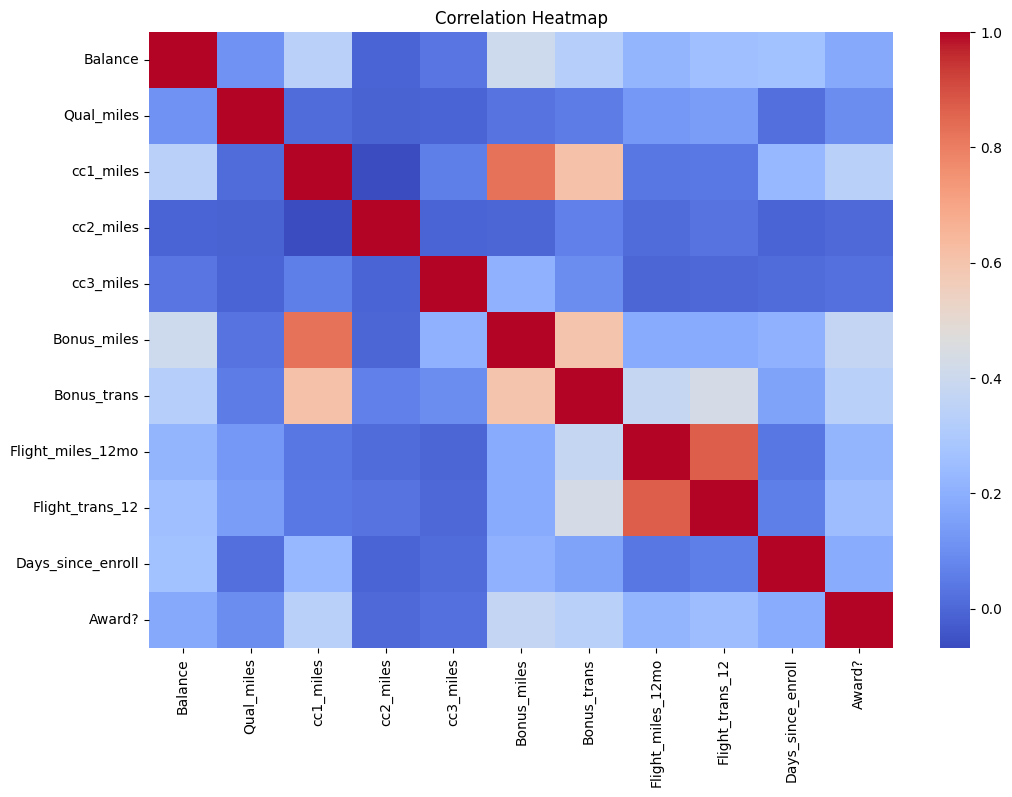

In [21]:
# 4. Bivariate Analysis
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


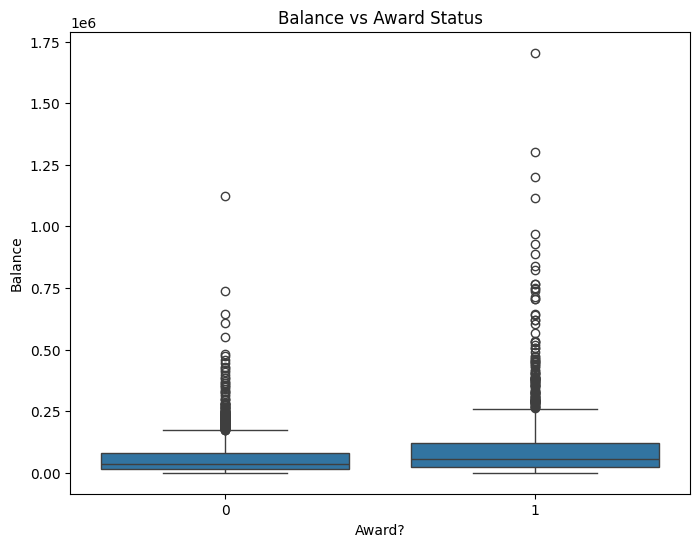

In [22]:
# Boxplot of Balance vs Award
plt.figure(figsize=(8, 6))
sns.boxplot(x="Award?", y="Balance", data=df)
plt.title("Balance vs Award Status")
plt.show()


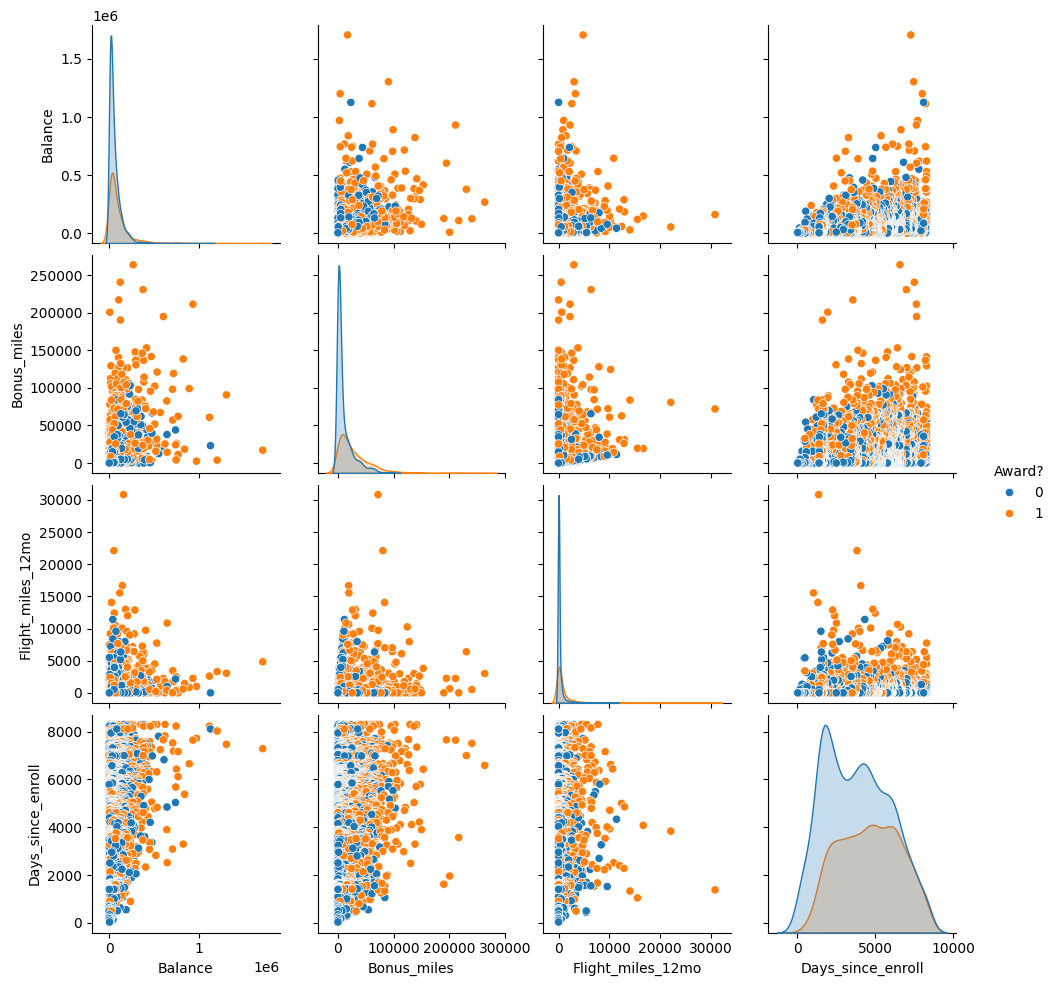

In [23]:
# 5. Multivariate Analysis
# Pairplot (only subset of columns to avoid clutter)
sns.pairplot(df[["Balance", "Bonus_miles", "Flight_miles_12mo", "Days_since_enroll", "Award?"]], hue="Award?")
plt.show()


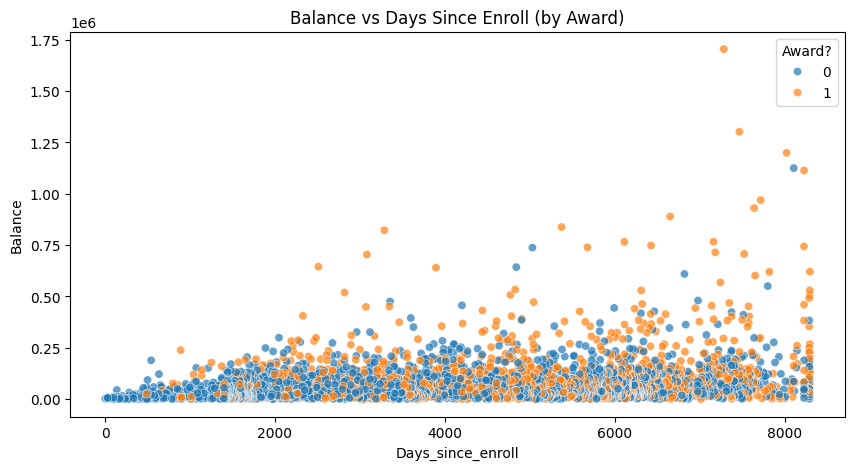

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Days_since_enroll", y="Balance", hue="Award?", data=df, alpha=0.7)
plt.title("Balance vs Days Since Enroll (by Award)")
plt.show()


In [25]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [26]:
num_cols = [col for col in df.columns if df[col].dtype=='int']

In [27]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

In [28]:
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,1,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,1,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,1,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,1,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,4,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,1,1,1,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1
3995,-0.091465,-0.186299,1,1,1,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1
3996,-0.000043,-0.186299,3,1,1,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1
3997,-0.185607,-0.186299,1,1,1,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0


In [29]:
df_scaled.describe()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3.999000e+03,3.999000e+03
mean,2.842882e-17,6.574164e-17,-2.842882e-17,-7.817925e-17,0.000000,1.776801e-17,5.685763e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.099918e-01,-1.208203e+00,-0.328603,-3.621679e-01,-1.993611e+00
25%,-5.465676e-01,-1.862987e-01,-6.582276e-01,-8.957878e-01,-0.328603,-3.621679e-01,-8.661823e-01
50%,-3.027332e-01,-1.862987e-01,-4.130308e-01,4.145743e-02,-0.328603,-3.621679e-01,-1.092530e-02
75%,1.866028e-01,-1.862987e-01,2.756198e-01,5.621492e-01,-0.106466,-9.850333e-02,8.097050e-01
max,1.618884e+01,1.422486e+01,1.020957e+01,7.747696e+00,21.683004,1.361205e+01,2.023095e+00


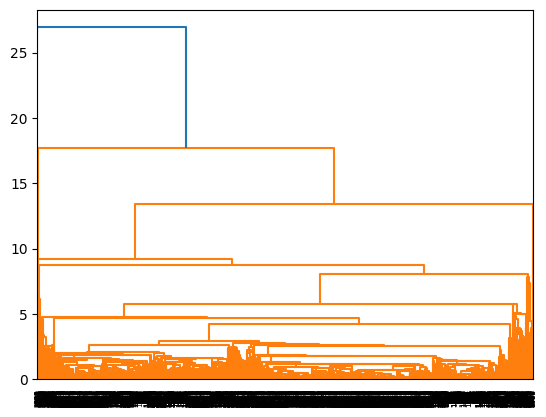

In [30]:
dendogram=sch.dendrogram(sch.linkage(df_scaled,method='centroid'))

In [31]:
model=AgglomerativeClustering(n_clusters=5,linkage='ward',metric='euclidean')

In [32]:
agg_model=model.fit_predict(df_scaled)

In [33]:
agg_model

array([0, 0, 0, ..., 4, 0, 0], shape=(3999,))

In [34]:
clusters=pd.DataFrame(agg_model,columns=['Clusters'])

In [35]:
clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,0
3995,0
3996,4
3997,0


In [36]:
df_scaled['Clusters']=clusters

In [37]:
df_scaled['Clusters'].value_counts()

Clusters
0    2466
4     996
1     435
2      58
3      44
Name: count, dtype: int64

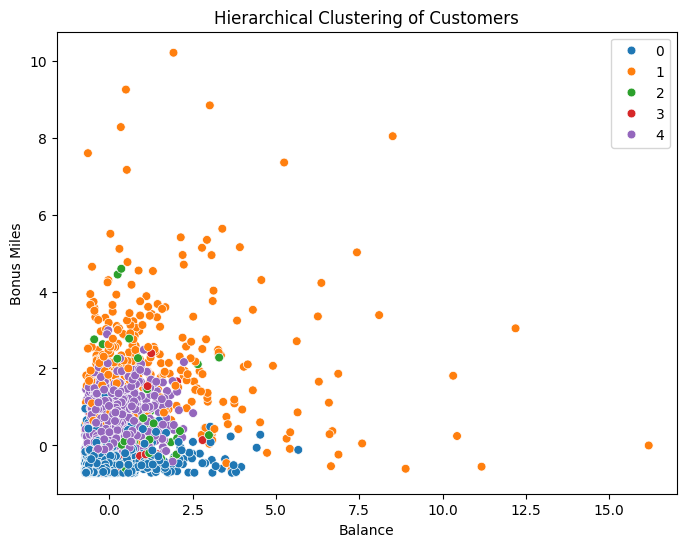

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_scaled,
    x="Balance",
    y="Bonus_miles",
    hue="Clusters",       # Color by clusters
    palette="tab10",      # Choose a color palette
    s=40                  # Marker size
)
plt.title("Hierarchical Clustering of Customers")
plt.xlabel("Balance")
plt.ylabel("Bonus Miles")
plt.legend()
plt.show()

In [39]:
linkages = ["ward", "complete", "average", "single"]
results = []
for link in linkages:
    if link == "ward":
        model = AgglomerativeClustering(n_clusters=5, linkage=link)# ward only supports euclidean
    else:
        model = AgglomerativeClustering(n_clusters=5, linkage=link, metric="euclidean")
    
    labels = model.fit_predict(df_scaled)
    
    # count points in each cluster
    counts = pd.Series(labels).value_counts().to_dict()
    
    results.append({
        "linkage": link,
        "cluster_counts": counts
    })

# Convert to DataFrame
df_counts = pd.DataFrame(results)
print(df_counts)


    linkage                           cluster_counts
0      ward  {0: 2466, 3: 996, 2: 435, 1: 58, 4: 44}
1  complete      {2: 3888, 1: 77, 0: 27, 4: 5, 3: 2}
2   average       {0: 3979, 1: 11, 2: 5, 3: 3, 4: 1}
3    single        {0: 3994, 1: 2, 2: 1, 4: 1, 3: 1}


In [40]:
# In linkage='ward' ,The Clusters are more balanced; no cluster is extremely tiny. This is usually desirable.
# so we take ward as linkage

In [41]:
model=AgglomerativeClustering(n_clusters=5,linkage='ward',metric='euclidean')
agg_final_model=model.fit_predict(df_scaled)

In [42]:
clusters=pd.DataFrame(agg_final_model,columns=['Clusters'])
clusters

,Clusters
0,0
1,0
2,0
3,0
4,2
...,...
3994,0
3995,0
3996,3
3997,0


In [43]:
silhouette_agg = silhouette_score(df_scaled, agg_final_model)
print("Agglomerative Silhouette Score:", silhouette_agg)

Agglomerative Silhouette Score: 0.5236504397079799


# KMEANS

In [44]:
df_scaled_1 = df.copy()
df_scaled_1[num_cols] = scaler.fit_transform(df[num_cols])

In [45]:
df_scaled_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,1,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,1,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,1,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,1,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,4,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,1,1,1,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1
3995,-0.091465,-0.186299,1,1,1,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1
3996,-0.000043,-0.186299,3,1,1,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1
3997,-0.185607,-0.186299,1,1,1,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0


In [46]:
kmeans_model=KMeans(n_clusters=5).fit(df_scaled_1)

In [47]:
kmeans_model.inertia_

17028.944549967982

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

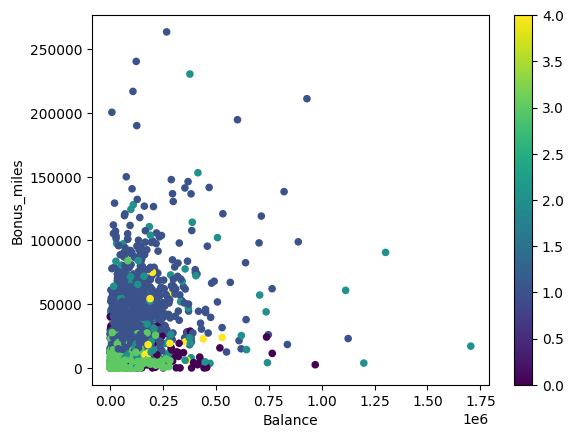

In [48]:
df.plot(x='Balance',y='Bonus_miles',c=kmeans_model.labels_,kind='scatter',cmap="viridis",)

In [49]:
wcss=[]
for i in range(5,20):
    kmeans_model=KMeans(n_clusters=i).fit(df_scaled_1)
    wcss.append(kmeans_model.inertia_)
wcss

[18286.98123824249,
 16599.664214347184,
 14504.82185218645,
 12912.798046935426,
 12535.208074670074,
 11755.090563811893,
 11254.985039351406,
 10915.872766014216,
 10379.55348465172,
 10147.732801873275,
 9799.268205578892,
 9669.317859291314,
 9393.987856179785,
 8866.359391358961,
 8838.895152388784]

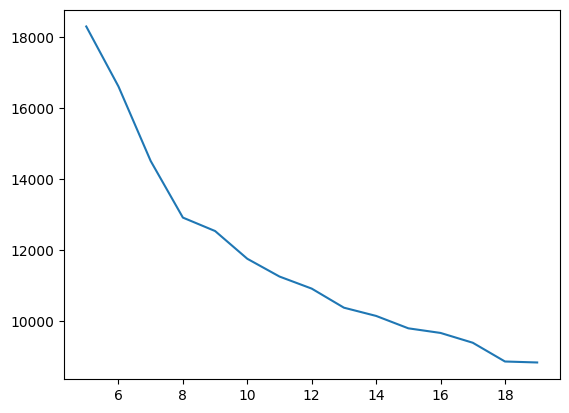

In [50]:
plt.plot(range(5,20),wcss)
plt.show()

In [51]:
# From the above curve the biggest drop is happens b/3 k=5 and 7 and after that the curve starts flattening.
# So the best elbow point is k=7

In [86]:
kmeans_final_model=KMeans(n_clusters=7).fit(df_scaled_1)

In [87]:
labels_kmeans=kmeans_final_model.fit_predict(df_scaled_1)  # <-- This gives an array of cluster labels

In [88]:
df_scaled_1['Clusters']=kmeans_final_model.labels_

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

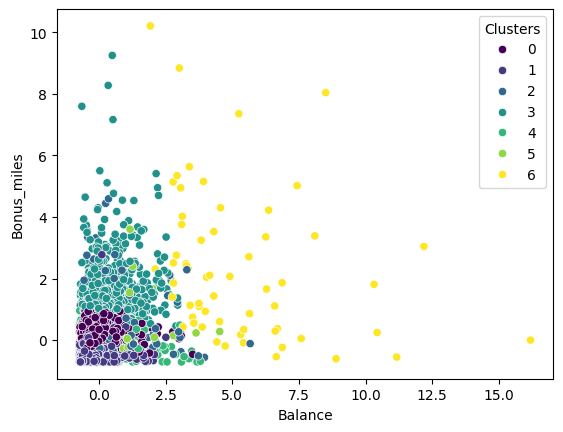

In [89]:
# scatter plot with hue
sns.scatterplot(
    data=df_scaled_1,
    x='Balance',
    y='Bonus_miles',
    hue='Clusters',
    palette='viridis'
)


In [90]:
kmeans_final_model.cluster_centers_ # centroids of the clusters

array([[-1.16775223e-02, -1.35549186e-01,  2.94209891e+00,
         1.00482509e+00,  1.00120627e+00,  1.04548789e-01,
         5.21322973e-01, -2.07349964e-01, -2.35583447e-01,
         9.68152115e-04,  4.47527141e-01,  1.99879373e+00],
       [-4.01296086e-01, -1.33572927e-01,  1.05107741e+00,
         1.01835595e+00,  1.00558659e+00, -5.72585827e-01,
        -6.21520777e-01, -1.92856364e-01, -2.06873034e-01,
        -9.57242864e-01,  1.72386273e-01,  7.54951657e-15],
       [ 6.03237886e-01,  3.59911033e-01,  1.91044776e+00,
         1.04477612e+00,  1.01492537e+00,  3.67634713e-01,
         1.62762454e+00,  3.87228059e+00,  3.98042644e+00,
         1.21477558e-01,  7.76119403e-01,  6.19402985e+00],
       [ 4.35771587e-01, -8.27128741e-02,  4.37420382e+00,
         1.00159236e+00,  1.05573248e+00,  1.57755914e+00,
         9.30281648e-01, -4.11216326e-02, -2.29306926e-02,
         4.64401208e-01,  6.56050955e-01,  3.00000000e+00],
       [-1.80486892e-01, -1.05553286e-01,  1.0818094

In [91]:
df_scaled_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,-0.451141,-0.186299,1,1,1,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,4
1,-0.539457,-0.186299,1,1,1,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,4
2,-0.320031,-0.186299,1,1,1,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,4
3,-0.583799,-0.186299,1,1,1,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,4
4,0.239678,-0.186299,4,1,1,1.083121,1.499394,1.154932,0.692490,1.363975,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,1,1,1,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1,1
3995,-0.091465,-0.186299,1,1,1,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1,1
3996,-0.000043,-0.186299,3,1,1,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1,0
3997,-0.185607,-0.186299,1,1,1,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0,1


In [92]:
silhouette_kmeans = silhouette_score(df_scaled,labels_kmeans )
print("KMeans Silhouette Score:", silhouette_kmeans)

KMeans Silhouette Score: 0.23348150346918564


# DBSCAN

In [60]:
arr=df.values

In [61]:
arr

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], shape=(3999, 11))

In [62]:
st_scaler=StandardScaler().fit(arr)

In [63]:
st_scaler

,copy,True
,with_mean,True
,with_std,True


In [64]:
X=st_scaler.transform(arr)

In [65]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]],
      shape=(3999, 11))

In [66]:
dbscan=DBSCAN(eps=1.5,min_samples=12)

In [67]:
dbscan.fit(X)

,eps,1.5
,min_samples,12
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [68]:
clusters=dbscan.fit_predict(X)

In [69]:
cl=pd.DataFrame(dbscan.labels_,columns=['Clusters'])

In [70]:
cl['Clusters'].value_counts()

Clusters
 0    2393
 1    1202
-1     389
 2      15
Name: count, dtype: int64

In [71]:
df_dbscan=pd.concat((df,cl),axis=1)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

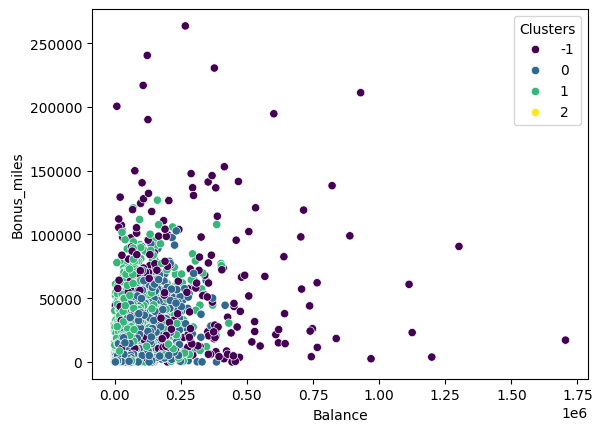

In [72]:
# scatter plot with hue
sns.scatterplot(
    data=df_dbscan,
    x='Balance',
    y='Bonus_miles',
    hue='Clusters',
    palette='viridis'
)

In [73]:
results = []
# loop over eps (float) and min_samples (int)
for i in np.arange(0.2, 3.0, 0.2):   # eps values
        # min_samples values
    dbscan = DBSCAN(eps=i, min_samples=12)
    clusters = dbscan.fit_predict(X) 
    # count clusters (including -1)
    counts = pd.Series(clusters).value_counts().to_dict() 
    # store results with parameters
    results.append({
        "eps": i,
        "min_samples": 12,
        "cluster_counts": counts
    })
# Convert to DataFrame
cl = pd.DataFrame(results)
print(cl.head(3))

   eps  min_samples                                     cluster_counts
0  0.2           12                          {-1: 3209, 0: 775, 1: 15}
1  0.4           12  {-1: 2266, 0: 1284, 3: 160, 5: 107, 2: 89, 6: ...
2  0.6           12  {0: 1458, -1: 1456, 1: 271, 3: 248, 4: 166, 5:...


In [74]:
print(cl.head(20))

    eps  min_samples                                     cluster_counts
0   0.2           12                          {-1: 3209, 0: 775, 1: 15}
1   0.4           12  {-1: 2266, 0: 1284, 3: 160, 5: 107, 2: 89, 6: ...
2   0.6           12  {0: 1458, -1: 1456, 1: 271, 3: 248, 4: 166, 5:...
3   0.8           12    {0: 2133, -1: 966, 1: 821, 2: 53, 4: 14, 3: 12}
4   1.0           12                        {0: 2266, 1: 1022, -1: 711}
5   1.2           12                 {0: 2333, 1: 1115, -1: 539, 2: 12}
6   1.4           12                 {0: 2374, 1: 1170, -1: 440, 2: 15}
7   1.6           12                 {0: 2406, 1: 1228, -1: 350, 2: 15}
8   1.8           12                 {0: 2427, 1: 1263, -1: 294, 2: 15}
9   2.0           12                 {0: 2440, 1: 1302, -1: 241, 2: 16}
10  2.2           12                          {0: 3767, -1: 213, 1: 19}
11  2.4           12                          {0: 3803, -1: 173, 1: 23}
12  2.6           12                          {0: 3823, -1: 153,

In [75]:
# from all these eps=1.6 is the better values

In [76]:
dbscan_final=DBSCAN(eps=1.6,min_samples=12)
dbscan_final.fit(X)
clusters=dbscan_final.fit_predict(X)
cl=pd.DataFrame(dbscan_final.labels_,columns=['Clusters'])
cl['Clusters'].value_counts()
df_final_dbscan=pd.concat((df,cl),axis=1)

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

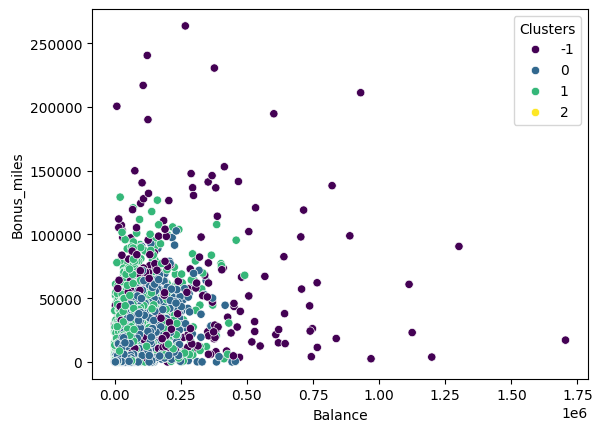

In [77]:
# scatter plot with hue
sns.scatterplot(
    data=df_final_dbscan,
    x='Balance',
    y='Bonus_miles',
    hue='Clusters',
    palette='viridis'
)

In [78]:
#DBSCAN
silhouette_score(X,dbscan_final.labels_)

0.24862825672365713